# 数据集：Wine Reviews (winemag-data-130k-v2.csv.csv)

### 导入所需python包，然后使用pandas读取数据集中的数据，并打印其基本信息

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('winemag-data-130k-v2.csv', usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### 打印数据集中前5行数据，观察数据内容

In [2]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 提取数据集中的标称属性，并获得每个可能取值的频数

In [3]:
data_object = data.select_dtypes(include='object')

pd.set_option('max_rows', 10)
for i in range(data_object.shape[1]):
    tmp = data_object.iloc[:,i]
    print('属性',tmp.name,'中频数前5的属性值和对应频数为：')
    print(tmp.value_counts().head(5))
    print('\n')

属性 country 中频数前5的属性值和对应频数为：
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64


属性 description 中频数前5的属性值和对应频数为：
Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.    3
This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.                                                                                        3
Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasi

### 针对数值属性，获得最大、最小、均值、中位数和四分位数

In [4]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
print(data.describe())

         points     price
count 129971.00 120975.00
mean      88.45     35.36
std        3.04     41.02
min       80.00      4.00
25%       86.00     17.00
50%       88.00     25.00
75%       91.00     42.00
max      100.00   3300.00


### 获得数值属性中缺失值的个数

In [5]:
data_int = data.select_dtypes(exclude='object')
for i in range(data_int.shape[1]):
    tmp = data_int.iloc[:,i]
    print(tmp.name, '的缺失值个数为：', len(tmp) - tmp.count())

points 的缺失值个数为： 0
price 的缺失值个数为： 8996


### 绘制属性points的直方图和QQ图，发现其符合正态分布。

### 绘制盒图，发现位于97.5-100之间的值较分散，属于离群值。在处理过程中可以考虑删除这些离群点。

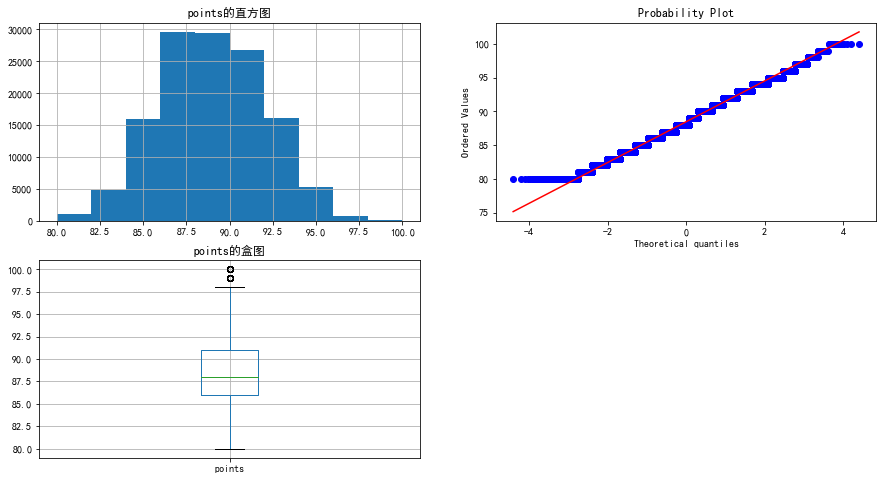

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('points的直方图')
data['points'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('points的QQ图')
stats.probplot(data['points'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('points的盒图')
pd.DataFrame({'points':data['points']}).boxplot()
plt.show()

#将离群点删除
#data = data[data['points']<=97.5]

### 绘制属性price的直方图和QQ图，发现其不符合正态分布。

### 绘制盒图，发现1000以上的值较分散，属于离群值。在处理过程中可以考虑删除这些离群值。

D:\studySoftware\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\studySoftware\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\studySoftware\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


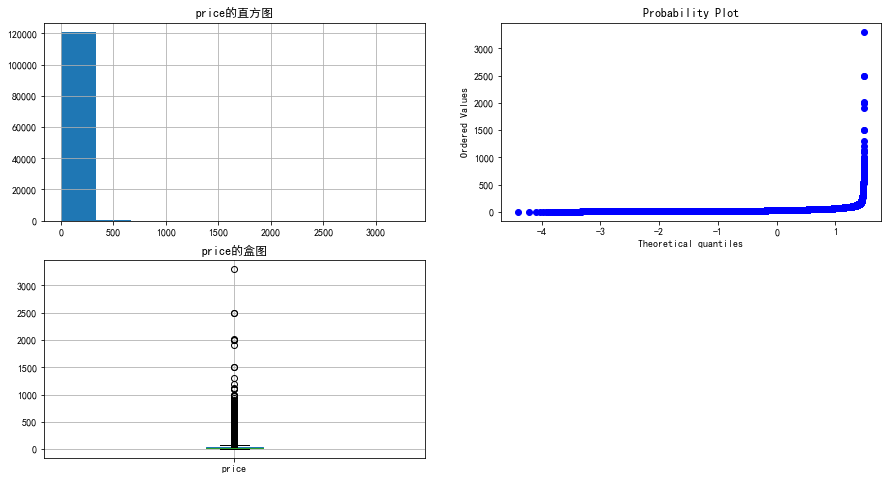

In [7]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('price的直方图')
data['price'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('price的QQ图')
stats.probplot(data['price'], dist="norm", plot=plt)

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('price的盒图')
pd.DataFrame({'price':data['price']}).boxplot()
plt.show()

#将离群点删除
#data = data[data['price']<=1000]

### 获得所有数值属性的盒图

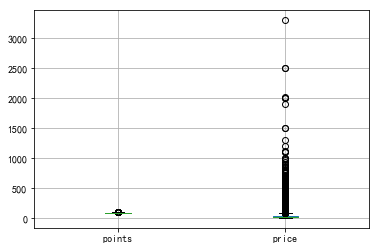

In [8]:
data_int.boxplot()

## 数值属性price中存在缺失值，以下将用4种方法进行处理

### 方法1：将缺失部分剔除，然后进行处理，并与原先的数据对比

当前缺失值个数为： 0


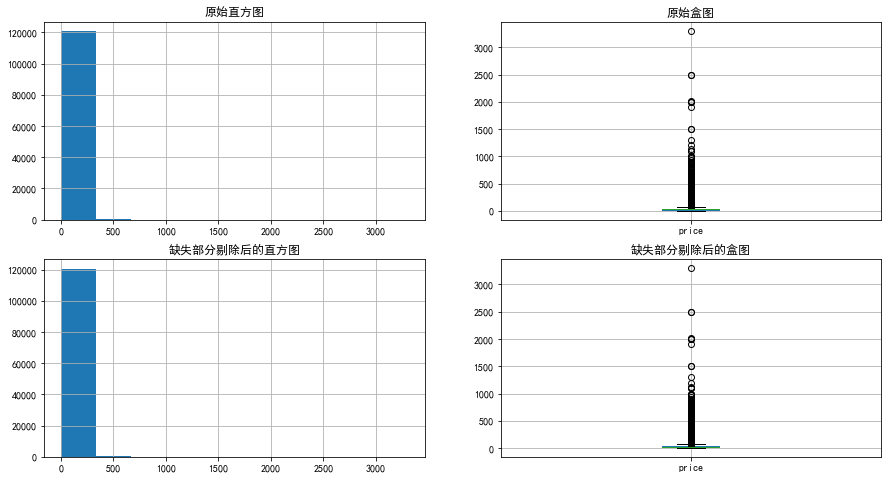

In [9]:
data_remove = data.price.dropna()
print('当前缺失值个数为：',len(data_remove) - data_remove.count())

fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('原始直方图')
data['price'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('原始盒图')
pd.DataFrame({'price':data['price']}).boxplot()

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('缺失部分剔除后的直方图')
data_remove.hist(bins=10)

fig4 = fig.add_subplot(2,2,4)
fig4.set_title('缺失部分剔除后的盒图')
pd.DataFrame({'price':data_remove}).boxplot()
plt.show()

### 方法2：用最高频率值来填补缺失值，然后进行处理，并与原先的数据对比

最高频率值（即众数）为： 20.0
当前缺失值个数为： 0


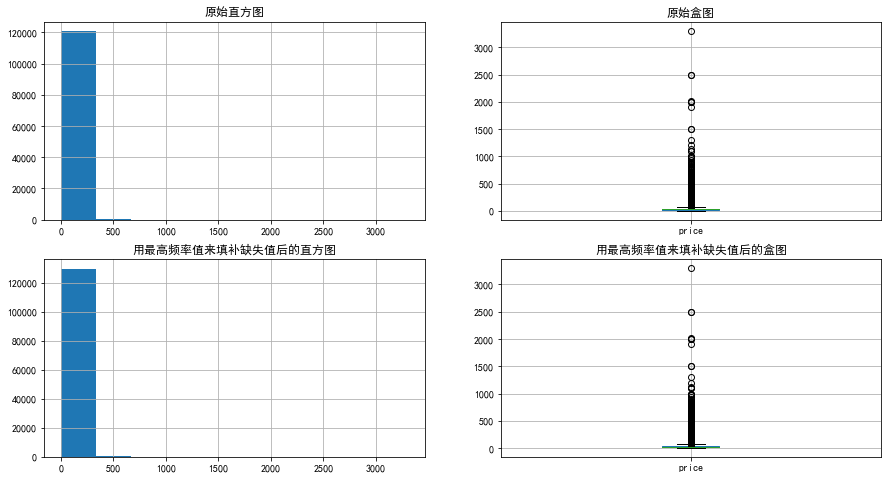

In [10]:
data_common = data.price.mode()
print("最高频率值（即众数）为：", data_common.values[0])
data_fill_common_data = data.price.fillna(data_common.values[0])
print('当前缺失值个数为：',len(data_fill_common_data) - data_fill_common_data.count())

fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('原始直方图')
data['price'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('原始盒图')
pd.DataFrame({'price':data['price']}).boxplot()

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('用最高频率值来填补缺失值后的直方图')
data_fill_common_data.hist(bins=10)

fig4 = fig.add_subplot(2,2,4)
fig4.set_title('用最高频率值来填补缺失值后的盒图')
pd.DataFrame({'price':data_fill_common_data}).boxplot()
plt.show()

### 方法3：通过属性的相关关系来填补缺失值，然后进行处理，并与原先的数据对比

首先计算data中所有数值属性之间的相关系数，发现points和price之间存在较强相关性

In [11]:
data.corr()

,points,price
points,1.00,0.42
price,0.42,1.00


根据points和price之间的相关关系填补缺失值，此处采用随机森林法

In [12]:
# 用随机森林对缺失值预测填充函数
from sklearn.ensemble import RandomForestRegressor

def set_missing(df):
    # 把已有的数值型特征取出来
    process_data = df.iloc[:,[1,0]]
    # 分成已知该特征和未知该特征两部分
    known = process_data[process_data.price.notnull()].values
    unknown = process_data[process_data.price.isnull()].values
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值为：",predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[df.price.isnull(), 'price'] = predicted
    return df

data_tmp = data_int.copy()
set_missing(data_tmp)
print('当前缺失值个数为：')
print(len(data_tmp) - data_tmp.count())

预测值为： [23. 23. 22. ... 39. 41. 39.]
当前缺失值个数为：
points    0
price     0
dtype: int64


可视化的与原先数据进行对比数据

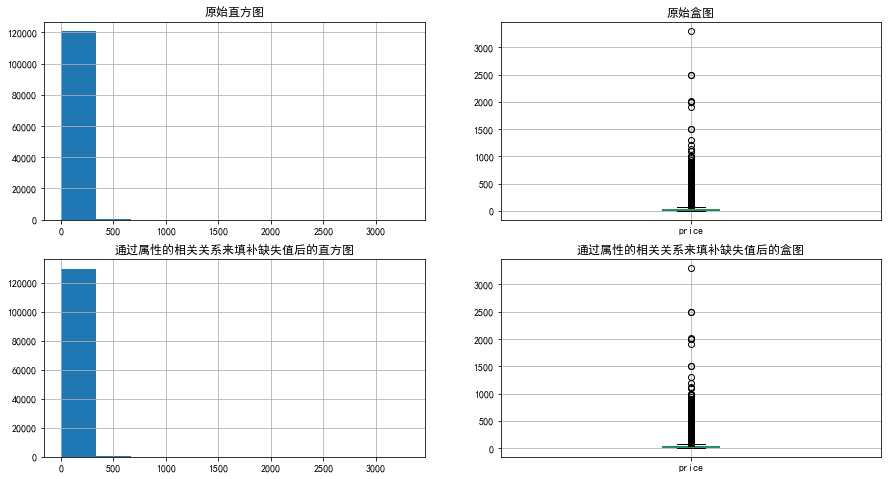

In [13]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('原始直方图')
data_int['price'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('原始盒图')
pd.DataFrame({'price':data_int['price']}).boxplot()

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('通过属性的相关关系来填补缺失值后的直方图')
data_tmp['price'].hist(bins=10)

fig4 = fig.add_subplot(2,2,4)
fig4.set_title('通过属性的相关关系来填补缺失值后的盒图')
pd.DataFrame({'price':data_tmp['price']}).boxplot()
plt.show()

### 方法4：通过数据对象之间的相似性来填补缺失值，然后进行处理，并与原先的数据对比

针对属性price中的缺失值，使用KNN根据其与属性points之间的关系进行对缺失值进行预测

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 数据的样本特征
train=data_int.loc[data_int.price.notnull(),'points']
train = np.array(train).reshape(-1,1)
# 样本标签,即要预测的标签,这儿要预测price的值
target=data_int.loc[data_int.price.notnull(),'price']

#print(train.shape)
#print(target.shape)

# 创建对象, 这儿的数据因为是离散型, 所以使用KNeighborsClassifier,
knn=KNeighborsClassifier()
# 对knn模型进行训练, 传入样本特征 和 样本标签
# 构建函数原型、构建损失函数、求损失函数最优解
knn.fit(train,target)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

根据上述的模型对price中的缺失值进行预测,获得预测的数据

In [15]:
# 获得缺失值
price_lost = data_int.loc[data_int.price.isnull(),'points']
price_lost = np.array(price_lost).reshape(-1,1)
# 使用predict函数对数据进行预测
price_predited = knn.predict(price_lost)
print(price_predited)

[11. 11.  8. ... 18. 22. 18.]


将预测的数据写回数据集中

In [16]:
data_knn = data_int.copy()
data_knn.loc[data_knn.price.isnull(), 'price'] = price_predited
print('当前缺失值个数为：')
print(len(data_knn) - data_knn.count())

当前缺失值个数为：
points    0
price     0
dtype: int64


可视化的与原先数据进行对比数据

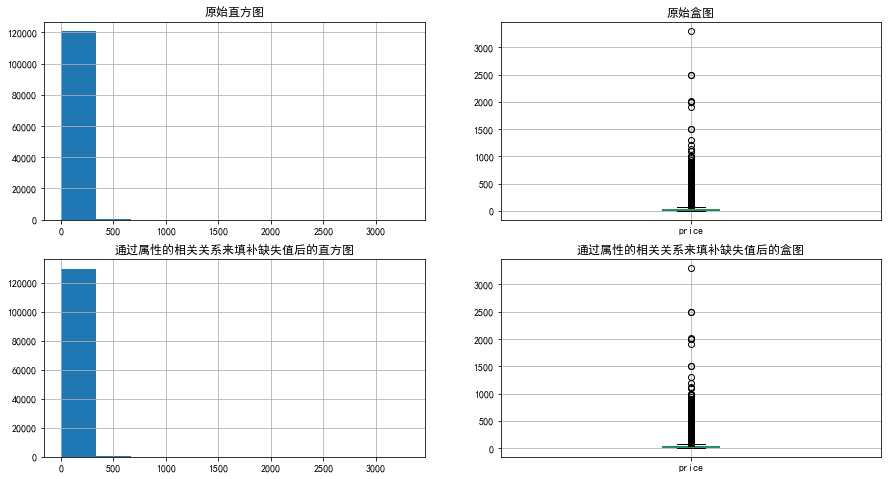

In [17]:
fig  = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,2,1)
fig1.set_title('原始直方图')
data_int['price'].hist(bins=10)

fig2 = fig.add_subplot(2,2,2)
fig2.set_title('原始盒图')
pd.DataFrame({'price':data_int['price']}).boxplot()

fig3 = fig.add_subplot(2,2,3)
fig3.set_title('通过属性的相关关系来填补缺失值后的直方图')
data_knn['price'].hist(bins=10)

fig4 = fig.add_subplot(2,2,4)
fig4.set_title('通过属性的相关关系来填补缺失值后的盒图')
pd.DataFrame({'price':data_knn['price']}).boxplot()
plt.show()